In [7]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

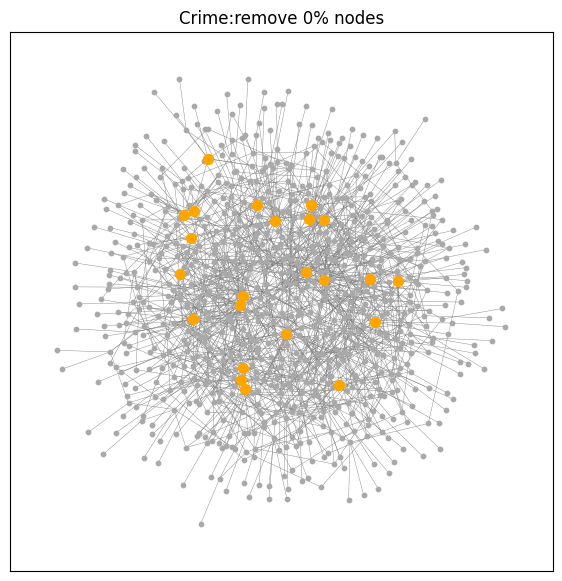

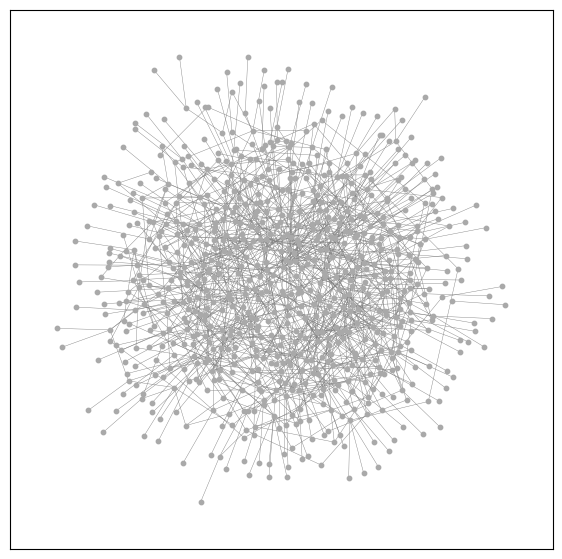

GCC size after removed: 748


In [58]:
datasets = ["Crime"]

for dataset in datasets:
    G = nx.read_edgelist(f"../../data/real/{dataset}.txt",nodetype=int)
    N = len(G.nodes())
    sol = np.loadtxt(f"./result/real/30_50_StepRatio_0.0100/{dataset}.txt",dtype=np.int)

    pos = nx.kamada_kawai_layout(G)
    # pos = nx.spring_layout(G)

    plt.figure(figsize=(7,7))
    node_size = [G.degree(i) ** 1.2 * 20 for i in list(G.nodes())]  # 节点大小
    nx.draw_networkx(G, pos, node_size=10,node_color="darkgray",width=0.3,edge_color="gray", with_labels=False)

    # 画出待拆除节点标签
    node_labels = {n:index+1 for index,n in enumerate(sol)}
    remove_nodes = sol[0:int(0.1*N)]
    remove_nodes = sol[0:23]
    nx.draw_networkx_nodes(G,pos,node_size=50,nodelist = remove_nodes,node_color='orange')
    # nx.draw_networkx_labels(G,pos,labels=node_labels,font_size=8)
    plt.title(f"{dataset}:remove 0% nodes".capitalize())
    plt.show()

    # 画出拆除后图
    G.remove_nodes_from(remove_nodes)
    # 去除孤立点
    isolates = nx.isolates(G)
    G.remove_nodes_from(list(isolates))
    # pos = nx.kamada_kawai_layout(G)
    plt.figure(figsize=(7,7))
    node_size = [G.degree(i) ** 1.2 * 20 for i in list(G.nodes())]  # 节点大小
    nx.draw_networkx(G, pos, node_size=10,node_color="darkgray",width=0.3,edge_color="gray", with_labels=False)
    plt.show()

    # 获取最大连通子图
    components = nx.connected_components(G)
    max_component = max(components, key=len)
    print("GCC size after removed:",len(max_component))

draw ANC

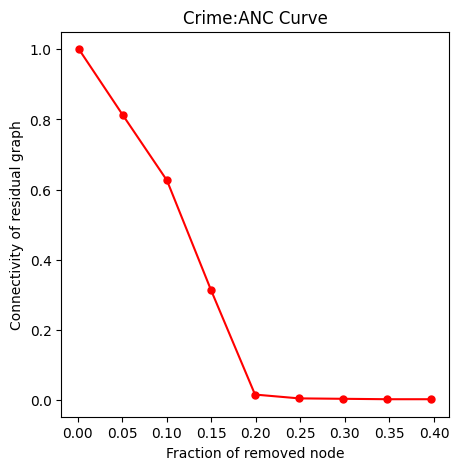

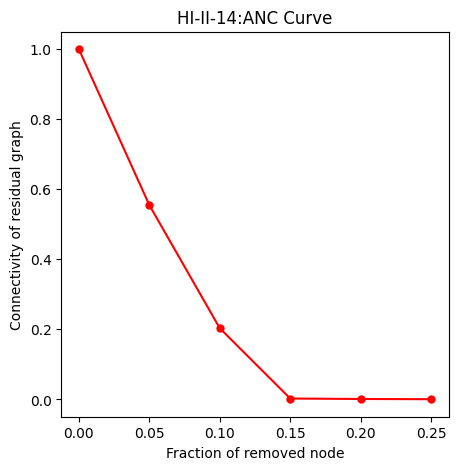

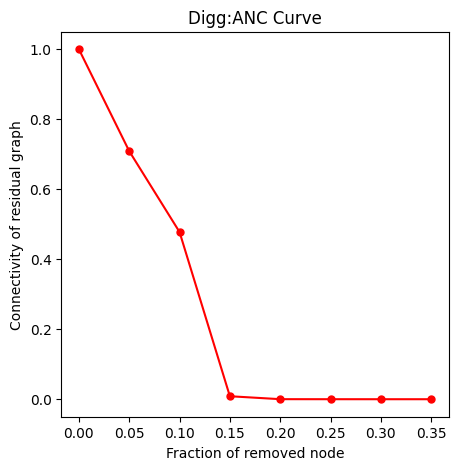

In [45]:
datasets = ['Crime','HI-II-14','Digg','Enron','Gnutella31','Facebook','Epinions','Youtube','Flickr']
datasets = ['Crime','HI-II-14','Digg']
for dataset in datasets:
    G = nx.read_edgelist(f"../../data/real/{dataset}.txt",nodetype=int)
    N = len(G.nodes())
    plt.figure(figsize=(5, 5))
    sol = np.loadtxt(f"./result/real/30_50_StepRatio_0.0100/{dataset}.txt",dtype=np.int)
    score_list = np.loadtxt(f"./result/real/30_50_StepRatio_0.0100/MaxCCList_Strategy_{dataset}.txt",dtype=float)
    x = np.array([(index+1)/N for index,node in enumerate(sol)])
    y = np.array([score_list[index] for index,node in enumerate(sol)])

    x = x[0:-1:int(0.05*N)]
    y = y[0:-1:int(0.05*N)]

    plt.plot(x,y,color='red',alpha=1,marker='.'
         ,markeredgecolor='r',markersize='10')
    plt.title(f"{dataset}:ANC Curve")
    plt.xlabel("Fraction of removed node")
    plt.ylabel("Connectivity of residual graph")
    plt.show()

In [5]:
from dotmotif import Motif, GrandIsoExecutor

executor = GrandIsoExecutor(graph=G,ignore_direction=True)

triangle = Motif("""
A -> B
B -> C
C -> A
""")

results = executor.find(triangle)

AttributeError: 'Graph' object has no attribute 'pred'

In [4]:
from dotmotif import Motif, GrandIsoExecutor
host = nx.fast_gnp_random_graph(100, 0.1, directed=True)
# Create the search engine.
E = GrandIsoExecutor(graph=host)

motif = Motif("""

# Example motif:

onewayEdge(a, b) {
    # An edge that only points in one direction,
    # with no reciprocal edge: 
    a -> b
    b !> a
}

# A triangle that only has edges pointing
# in one direction:
onewayEdge(A, B)
onewayEdge(B, C)
onewayEdge(C, A)

""")

motif = Motif("""
A -> B
B -> C
C -> A
""")

results = E.find(motif)